# Tarea 3 - Ingeniería de Satélites
<strong>Ricardo Ramos</strong>

Investigar el estado del arte de propulsores de cohetes miniaturizados de estado solido para plataformas cubesats de 3 a 12 Unidades.

a) Asumiendo una distribución de masa o Inercia y una capacidad energética para estas 3 plataformas propone una ubicación y uso de 1 o mas de estos propulsores para estudiar el tiempo de vida medio de estadía orbital de estos satellites entre las órbitas 350 km - 370 km. Estudia la diferencia de tiempo entre no tener propulsion y tenerla.

b) Propone una estrategia de deorbiting con estos propulsores. Estudia el tiempo de caída de cada uno de los satélites que propusiste y evaluar el consumo energético que se debería tener. Para bajarlos desde una altura de 500 km.


In [1]:
import numpy as np
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as  plt
import matplotlib.dates as mdates
import mplcursors
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as mticker

from models import atmosDensity, Cubesat
from maneuvers import Maneuvers
from coordinates import cart2kep
from constants import constants
import helpers

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

### a)

In [29]:
#----- INITIAL CONDITIONS -----
# Explicit conditions
rp = constants.Re+370e3
ra = constants.Re+370e3
i = 1*np.pi/180
omega = 1*np.pi/180
Omega = 1*np.pi/180
M = 1*np.pi/180
#-------------------
# Derived conditions
e = (ra-rp)/(ra+rp)
a = (ra+rp)/2
#--------------------
# Final conditions
coe = [a,e,i,omega,Omega,M]
date = datetime.now()

#----- SPACECRAFT DEFINITIONS -----
satellite = Cubesat()

# ---- MANEUVERING ------
maneuvers = Maneuvers(coe,satellite,date)
maneuvers2 = Maneuvers(coe,satellite,date)

maneuvers.addPerturbation("atmosphere")
#%time maneuvers.propagate2(60*60*24*348)
%time maneuvers.propagate2(60*60*24*10)
maneuvers2.addPerturbation("atmosphere")
maneuvers2.addPerturbation("thrust")
%time maneuvers2.propagate2(60*2)
maneuvers2.removePerturbation("thrust")
%time maneuvers2.propagate2(60*60*24*10)

Propagating...from day  0.0  to  10.0
Day:0.0	Height: 369.9999999999991 km	Mass: 1.0
Day:8.459902022587159e-08	Height: 369.9999999999981 km	Mass: 1.0
Day:1.6919804045174318e-07	Height: 370.0000000000009 km	Mass: 1.0
Day:0.0008461594002991678	Height: 369.9999995906474 km	Mass: 1.0
Day:0.0008461594002991678	Height: 369.99999999991803 km	Mass: 1.0
Day:6.000614044158628	Height: 369.1544835447771 km	Mass: 1.0
Day:6.000614044158628	Height: 369.1538686700994 km	Mass: 1.0
Perc:0.0


C:\Users\MrPapasFritas\Dropbox\U\Ingeniería Satelites\frames-days\coordinates.py:98: RuntimeWarning: invalid value encountered in double_scalars
  zeta = np.arcsin(g/np.sqrt(g**2+f**2))
C:\Users\MrPapasFritas\Dropbox\U\Ingeniería Satelites\frames-days\coordinates.py:106: RuntimeWarning: invalid value encountered in double_scalars
  M = M % 2*np.pi


Perc:10.0
Perc:20.0
Perc:30.0
Perc:40.0
Perc:50.0
Perc:60.0
Perc:70.0
Perc:80.0
Perc:90.0
Wall time: 1.36 s
Propagating...from day  0.0  to  0.001388888888888889
Day:0.0	Height: 369.9999999999991 km	Mass: 1.0
Day:1.6813170017864884e-07	Height: 369.9999999999991 km	Mass: 0.999997942504179
Day:1.6813170017864884e-07	Height: 369.9999999999991 km	Mass: 0.999997942504179
Day:3.362634003572977e-07	Height: 369.9999999999981 km	Mass: 0.9999958850083579
Day:3.362634003572977e-07	Height: 369.9999999999991 km	Mass: 0.9999958850083579
Day:9.66764232997187e-05	Height: 369.999999460334 km	Mass: 0.9988169313893569
Day:9.66764232997187e-05	Height: 369.99988977499305 km	Mass: 0.9988169313893569
Day:0.00019301658319908013	Height: 369.99955956493505 km	Mass: 0.9976379777703559
Day:0.00019301658319908013	Height: 369.999340424113 km	Mass: 0.9976379777703559
Day:0.00028935674309844156	Height: 369.9981338787712 km	Mass: 0.9964590241513549
Day:0.00028935674309844156	Height: 369.99791457223427 km	Mass: 0.99645

C:\Users\MrPapasFritas\Dropbox\U\Ingeniería Satelites\frames-days\coordinates.py:98: RuntimeWarning: invalid value encountered in double_scalars
  zeta = np.arcsin(g/np.sqrt(g**2+f**2))
C:\Users\MrPapasFritas\Dropbox\U\Ingeniería Satelites\frames-days\coordinates.py:106: RuntimeWarning: invalid value encountered in double_scalars
  M = M % 2*np.pi


Day:2.000681729360105	Height: 322.19765245572387 km	Mass: 0.9830036032361139
Day:2.000681729360105	Height: 322.1942110456508 km	Mass: 0.9830036032361139
Day:4.000852069292471	Height: 250.43359286248963 km	Mass: 0.9830036032361139
Day:4.000852069292471	Height: 250.4336506041484 km	Mass: 0.9830036032361139
Day:5.0004202746423045	Height: 230.83453359647467 km	Mass: 0.9830036032361139
Day:5.0004202746423045	Height: 230.83472772668955 km	Mass: 0.9830036032361139
Day:6.000741450032123	Height: 230.1822035441976 km	Mass: 0.9830036032361139
Day:6.000741450032123	Height: 230.17982100887875 km	Mass: 0.9830036032361139
Perc:0.0
Perc:10.0
Perc:20.0
Perc:30.0
Perc:40.0
Perc:50.0
Perc:60.0
Perc:70.0
Perc:80.0
Perc:90.0
Wall time: 2.46 s


<IPython.core.display.Javascript object>


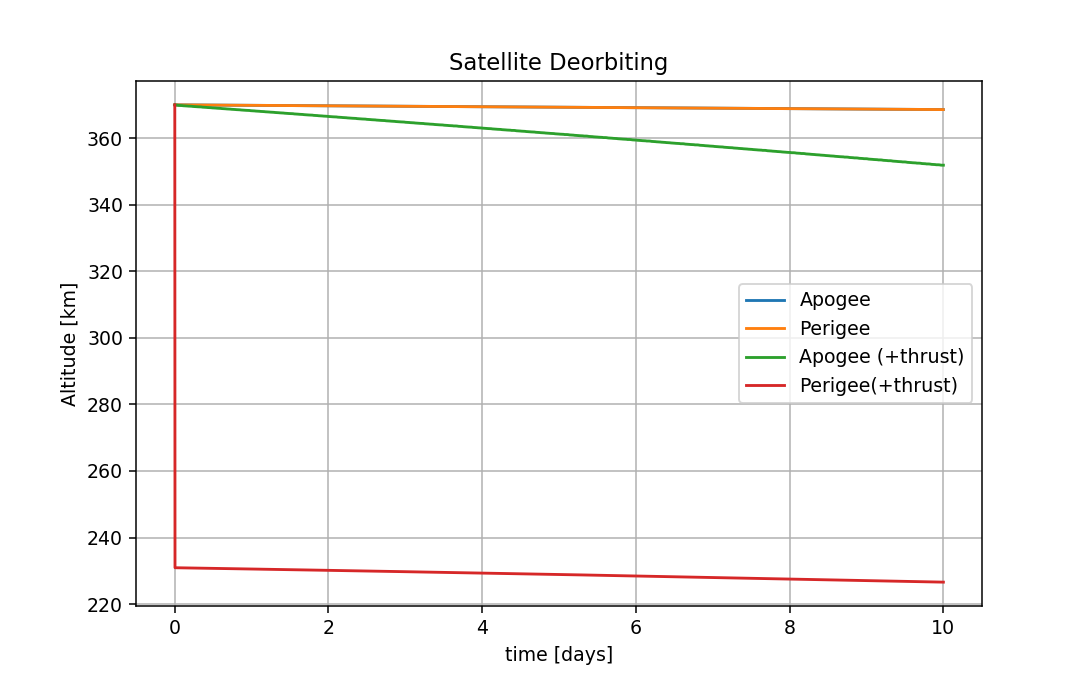

In [30]:
# CALCULATE PERIGEES AND APOGEES
perigees = (1-maneuvers.history.coe[:,1])*maneuvers.history.coe[:,0]
apogees = (1+maneuvers.history.coe[:,1])*maneuvers.history.coe[:,0]

perigees2 = (1-maneuvers2.history.coe[:,1])*maneuvers2.history.coe[:,0]
apogees2 = (1+maneuvers2.history.coe[:,1])*maneuvers2.history.coe[:,0]

#PLOTTING
plt.figure(figsize=(8,5))
plt.plot(maneuvers.history.t[::50]/60/60/24,(apogees[::50]-constants.Re)/1e3, label="Apogee");
plt.plot(maneuvers.history.t[::50]/60/60/24,(perigees[::50]-constants.Re)/1e3, label="Perigee");
plt.plot(maneuvers2.history.t/60/60/24,(apogees2-constants.Re)/1e3, label="Apogee (+thrust)");
plt.plot(maneuvers2.history.t/60/60/24,(perigees2-constants.Re)/1e3, label="Perigee(+thrust)");

plt.grid();
plt.legend();
plt.title("Satellite Deorbiting")
plt.ylabel("Altitude [km]")
plt.xlabel("time [days]")
mplcursors.cursor(hover=True);

In [5]:
#----- INITIAL CONDITIONS -----
# Explicit conditions
rp = constants.Re+370e3
ra = constants.Re+370e3
i = 1*np.pi/180
omega = 1*np.pi/180
Omega = 1*np.pi/180
M = 1*np.pi/180
#-------------------
# Derived conditions
e = (ra-rp)/(ra+rp)
a = (ra+rp)/2
#--------------------
# Final conditions
coe = [a,e,i,omega,Omega,M]
date = datetime.now()

In [6]:
maneuvers.addPerturbation("atmosphere")
%time maneuvers.propagate2(60*60*24*348)

Propagating...from day  10.0  to  358.0
Day:10.0	Height: 368.5829949339125 km	Mass: 1.0
Day:10.000694445830232	Height: 368.5828142228108 km	Mass: 1.0
Day:10.000694445830232	Height: 368.5828144553145 km	Mass: 1.0
Day:13.000565850788016	Height: 368.1511886735372 km	Mass: 1.0
Day:13.000565850788016	Height: 368.1507186473524 km	Mass: 1.0
Day:22.000265067140802	Height: 366.83408970064295 km	Mass: 1.0
Day:22.000265067140802	Height: 366.8336077900538 km	Mass: 1.0
Day:32.00102133918599	Height: 365.33324666866196 km	Mass: 1.0
Day:32.00102133918599	Height: 365.33275078654754 km	Mass: 1.0
Day:41.00072055554125	Height: 363.9451807544846 km	Mass: 1.0
Day:41.00072055554125	Height: 363.944671662556 km	Mass: 1.0
Day:50.00041977189571	Height: 362.52065931401495 km	Mass: 1.0
Day:50.00041977189571	Height: 362.5201363121727 km	Mass: 1.0
Day:59.000118988246015	Height: 361.05731970947795 km	Mass: 1.0
Day:59.000118988246015	Height: 361.0567820296548 km	Mass: 1.0
Day:69.00087526028635	Height: 359.385717066096

KeyboardInterrupt: 